C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

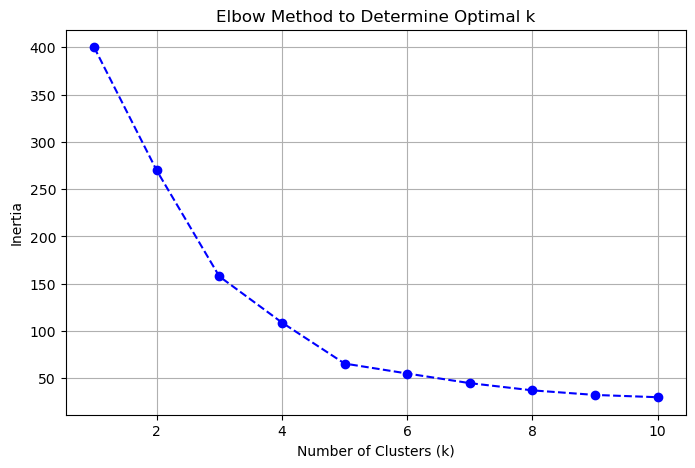

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Silhouette Score: 0.555


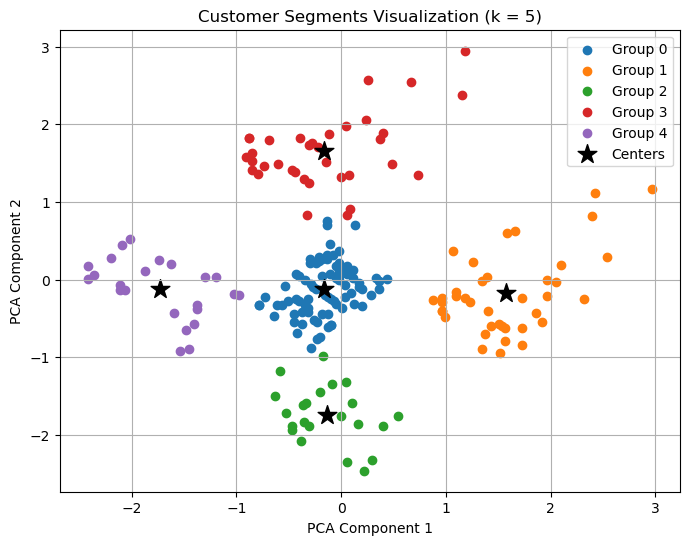


Average Characteristics per Cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

Cluster Descriptions:
Cluster 0: Income = 55.3, Spending Score = 49.5
Cluster 1: Income = 86.5, Spending Score = 82.1
Cluster 2: Income = 25.7, Spending Score = 79.4
Cluster 3: Income = 88.2, Spending Score = 17.1
Cluster 4: Income = 26.3, Spending Score = 20.9


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1. Load the dataset
df=pd.read_csv('Mall_Customers.csv')

# 2. Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Elbow Method to find optimal k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

# 5. Choose optimal k (manually or based on the elbow plot)
optimal_k = 5  # Change this if the elbow plot suggests another value

# 6. K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Silhouette Score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {score:.3f}")

# 8. Visualize clusters using PCA (2D view)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1], label=f'Group {cluster}')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            s=200, marker='*', c='black', label='Centers')
plt.title(f'Customer Segments Visualization (k = {optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 9. Cluster Summary
print("\nAverage Characteristics per Cluster:")
summary = df.groupby('Cluster')[features].mean()
print(summary)

# 10. Optional: Add basic cluster naming based on income/spending pattern
print("\nCluster Descriptions:")
for cluster in summary.index:
    income = summary.loc[cluster, 'Annual Income (k$)']
    spending = summary.loc[cluster, 'Spending Score (1-100)']
    print(f"Cluster {cluster}: Income = {income:.1f}, Spending Score = {spending:.1f}")
